# Seismic read and write

Before doing anything, it's worth reading the [SEG-Y rev 1 specification](http://www.seg.org/documents/10161/77915/seg_y_rev1.pdf). Here are the highlights:

* The text header can be ASCII encoded, so let's stick to that.
* No floats in the headers, only 2-byte ints.
* No [little-endian](https://en.wikipedia.org/wiki/Endianness) anything, anywhere (watch out, most computers are little-endian)
* Only Rev 1 allows IEEE floats, so let's stick to that
* The binary header *must* contain certain information: 
 * Number of data traces per ensemble (for prestack)
 * Number of auxilliary traces per ensemble (for prestack)
 * Sample interval **in microseconds**
 * Number of samples per data trace
 * Data sample format code:
   * 1 = 32-bit IBM
   * 2 = 32-bit int
   * 3 = 16-bit int
   * 5 = 32-bit IEEE — stick to this
   * 8 = 8-bit int
 * Ensemble fold (highly recommended)
 * Trace sorting code (highly recommended)
 * Measurement system (highly recommended)
 * SEG Y format revision number — stick to 0100<sub>16</sub>
 * Fixed length trace flag — '1' means all same length, '0' means trace length varies
 * Number of extended textural file headers — stick to 0 :)


## ObsPy

Playing around with ObsPy, especially SEGY read and write. [More here.](http://docs.obspy.org/packages/obspy.segy.html)

In [1]:
import obspy

## Reading data

In [2]:
ls data

2d_gaussian.png                   P-129_striplog_from_cuttings.las
31_81_PR.sgy                      P-129_striplog_from_image.las
F3_MFS4_Horizon.txt               P-63_cuttings.csv
F3_Seismic_500-1500ms.txt         crop_very_tall.jpg
F3_very_small.sgy                 crop_very_wide.jpg
HUN00-ALT-01_STK.sgy              ld0057_file_00095.sgy
M-MG-70_14.3_135.9.png            out.sgy
Nova_Scotia.sgy                   test.jpeg
P-129_280_1935.png                test.sgy
P-129_out.LAS*


In [5]:
filename = "data/HUN00-ALT-01_STK.sgy"
# filename = "data/F3_very_small.sgy"
# filename = "data/Nova_Scotia.sgy"
section = obspy.read(filename)

In ObsPy, a `Stream` is a sequence of `Trace` objects.

In [6]:
type(section), type(section[0])

(obspy.core.stream.Stream, obspy.core.trace.Trace)

In [8]:
print(section)

5859 Trace(s) in Stream:

Seq. No. in line:    1 | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:01.999000Z | 1000.0 Hz, 2000 samples
...
(5857 other traces)
...
Seq. No. in line: 5859 | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:01.999000Z | 1000.0 Hz, 2000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


Traces know how to plot themselves, but streams don't:

In [9]:
%matplotlib inline
section[5].plot()

Exception: Nothing to plot

In [10]:
section[3].data[:50]

array([], dtype=float64)

In [16]:
import numpy
data = numpy.vstack([d for d in section])

In [24]:
section.traces[0].stats

         network: 
         station: 
        location: 
         channel: 
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-01T00:00:01.999000Z
   sampling_rate: 1000.0
           delta: 0.001
            npts: 2000
           calib: 1.0
         _format: SEGY
            segy: AttribDict({'trace_header': LazyTraceHeaderAttribDict({'year_data_recorded': 0, 'unpacked_header': b'\x00\x00\x00\x01\x00\x00\x00\x01\x00\x00\x00\x01\x00\x00\x00\x01\x00\x01\x8a\x88\x00\x00\x00\x01\x00\x00\x00\x01\x00\x02\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xf6\x00I\xd5\xff\x02\xfa0\t\x00I\xd5\xff\x02\xfa0\t\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x07\xd0\x03\xe8\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [17]:
data

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,  -62.00059509,
        -111.97116089, -146.0852356 ],
       [   0.        ,    0.        ,    0.        , ...,   35.47406006,
          40.16088867,   38.37229919],
       ..., 
       [   0.        ,    0.        ,    0.        , ...,  205.56137085,
         192.66181946,  168.31199646],
       [   0.        ,    0.        ,    0.        , ...,  186.8026123 ,
         165.77934265,  126.12452698],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]], dtype=float32)

Can plot this as a section; have to transpose though, since 'rows' are actually traces:

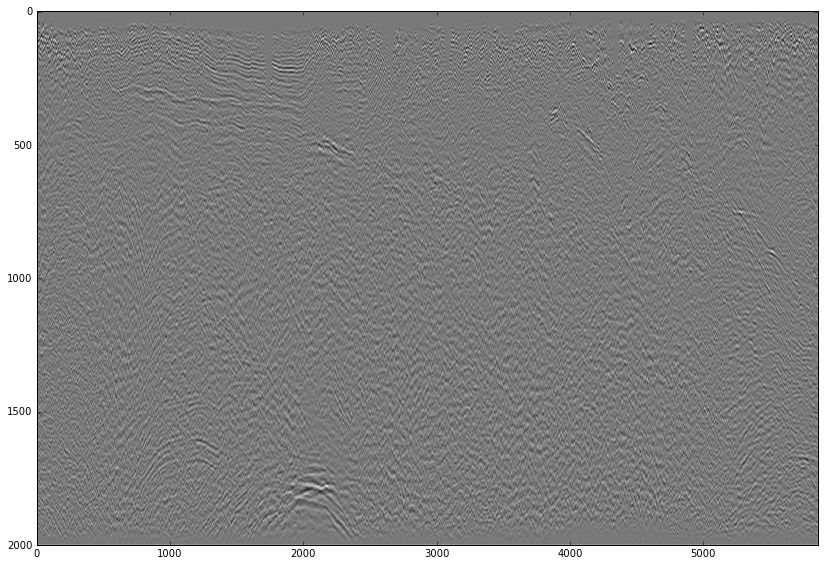

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))
plt.imshow(data.T, cmap="gray", interpolation='none', aspect=2)
plt.show()

In [18]:
import bruges as b
d, c = b.attribute.dipsteer(data.T, window_length=24, stepout=1, maxlag=16, overlap=1, dt=4)

/Users/matt/anaconda/envs/python3/lib/python3.4/site-packages/bruges/attribute/dipsteer.py:47: RuntimeWarning: invalid value encountered in sqrt
  norm_factor = np.sqrt(energy(data, window_length))
/Users/matt/anaconda/envs/python3/lib/python3.4/site-packages/bruges/attribute/dipsteer.py:48: RuntimeWarning: invalid value encountered in true_divide
  norm_data = data / norm_factor


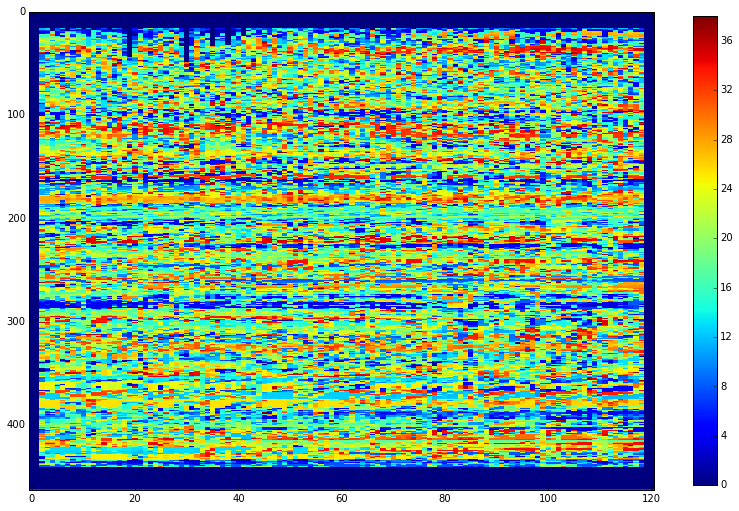

In [19]:
plt.figure(figsize=(14,14))
plt.imshow(c, aspect=0.2, interpolation="none")
plt.colorbar(shrink=0.6)

This now represents what we would make as a synthetic seismic section, say.

## Reading trace headers

Streams carry file-wide headers, which we'll get to. Here are the trace headers.

In [15]:
t = section[3]
print(t)

Seq. No. in line:    4 | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:06.000000Z | 250.0 Hz, 1501 samples


In [16]:
t.stats.segy.trace_header.trace_sequence_number_within_line

4

In [17]:
t.stats.segy.trace_header

LazyTraceHeaderAttribDict({'unpacked_header': "\x00\x00\x00\x04\x00\x00\x00\x04\x00\x00\x00o\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00h\x00\x00\x00\x01\x00\x01\x00\x01\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\xdd\x0f\xa0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\n\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x17p\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00#\x00\x00'\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00", 'sample

In [18]:
t.stats.segy.trace_header.number_of_samples_in_this_trace

1501

In [19]:
t.stats.segy.trace_header.sample_interval_in_ms_for_this_trace

4000

In [20]:
t.stats.segy.trace_header.datum_elevation_at_receiver_group

0

In [21]:
import codecs
header = t.stats.segy.trace_header.unpacked_header
codecs.decode(header, "cp037").encode('utf-8')  # cp037 is EBCDIC; no idea how to read this nonsense

'\x00\x00\x00\xc2\x9c\x00\x00\x00\xc2\x9c\x00\x00\x00?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc3\x87\x00\x00\x00\x01\x00\x01\x00\x01\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\t\xc3\xb9\x0f\xc2\xb5\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\xc2\x8e\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc2\x87\xc3\xb8\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc2\x83\x00\x00\x1b\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

OK, let's ignore this for now.

## Reading SEGY file header

Encoded as EBCDIC or ASCII.

In [105]:
from obspy.segy.segy import readSEGY
section = readSEGY(filename, unpack_headers=True)

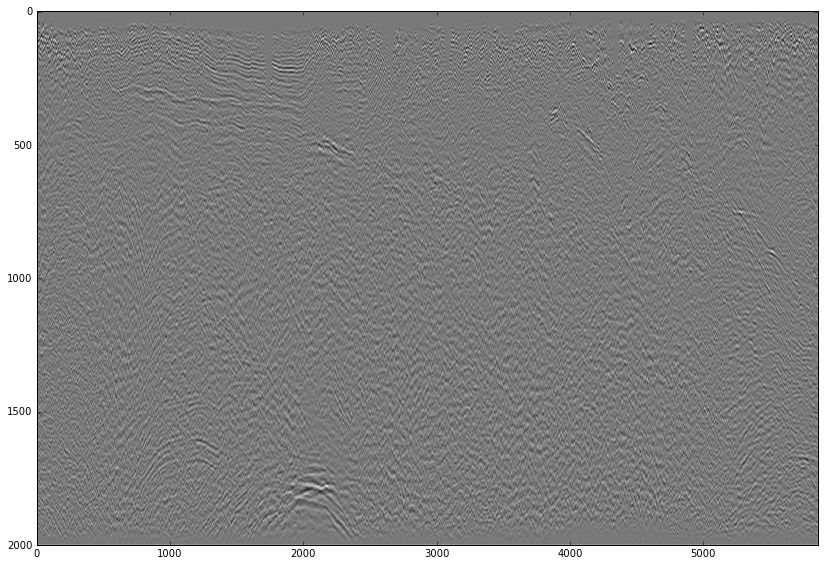

In [113]:
data = np.vstack([t.data for t in section.traces])
plt.figure(figsize=(14,14))
plt.imshow(data.T, cmap="gray", interpolation='none', aspect=2)
plt.show()

In [112]:
data

array([[<obspy.segy.segy.SEGYTrace object at 0x139b761d0>],
       ..., 
       [<obspy.segy.segy.SEGYTrace object at 0x10fe1cc88>]], dtype=object)

In [103]:
import numpy as np

def chunk(string, width=80):
    lines = int(np.ceil(len(string) / width))
    result = ''
    for i in range(lines):
        line = string[i*width:i*width+width]
        result += line + (width-len(line))*' ' + '\n'
    return result

In [91]:
s = section.textual_file_header.decode()
print(chunk(s))

C01  PROCESSED BY: VERITAS GEOSERVICES LTD.                                     
C02  CLIENT      : HUNT OIL COMPANY                                             
C03  AREA        : ALTON                                                        
C04  LINE        : ALT-01                                                       
C05  DATA   NOISE ATTENUATED STRUCTURE STACK                                    
C06         (FILTERED/SCALED)                                                   
C07                                                                             
C08                                                                             
C09  SAMPLE RATE   2 MS.                                                        
C10  FIELD DATA LENGTH 3.0 SEC.; (PROCESSED TO 2.0 SEC)                         
C11  PROCESSING SEQUENCE:                                                       
C12  DEMULTIPLEX:SAMPLE RATE:1 MS RECORD LEN.:3 SEC.S                           
C13  GEOMETRY               

## Writing data

We could also do this by making a list of traces and making the stream out of that:

    stream = obspy.Stream(list_of_obspy_traces)
    
But this way is more direct...

In [22]:
from obspy.core import read, Trace, AttribDict, Stream, UTCDateTime
from obspy.segy.segy import SEGYBinaryFileHeader
from obspy.segy.core import readSEGY

from obspy.segy.segy import SEGYTraceHeader
from obspy.segy.segy import SEGYFile

In [23]:
stream = obspy.Stream()

for i, trace in enumerate(data):
    
    # Make the trace.
    tr = obspy.Trace(trace)
    
    # Add required data.
    tr.stats.delta = 0.004
    # tr.stats.starttime = 0  # Not strictly required.

    # Add yet more to the header (optional).
    tr.stats.segy = {'trace_header': SEGYTraceHeader()}
    tr.stats.segy.trace_header.trace_sequence_number_within_line = i + 1
    # tr.stats.segy.trace_header.receiver_group_elevation = 0
    
    # Append the trace to the stream.
    stream.append(tr)

In [24]:
print(stream)

534 Trace(s) in Stream:

Seq. No. in line:    1 | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:06.000000Z | 250.0 Hz, 1501 samples
...
(532 other traces)
...
Seq. No. in line:  534 | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:06.000000Z | 250.0 Hz, 1501 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


Now we can write the file.

In [25]:
stream.write('data/out.sgy', format='SEGY', data_encoding=1)  # encode 5 for IEEE

Check that we did things properly.

In [26]:
filename = "data/out.sgy"
h = obspy.read(filename, headonly=True)

In [27]:
h[3].stats.segy.trace_header.sample_interval_in_ms_for_this_trace  # Actually µs not ms

4000

In [28]:
h[3].stats.segy.trace_header.trace_sequence_number_within_line

4

## Getting file-wide headers

So far we only attached metadata to the traces, but we can do more by attaching some filewide metadata, like a textual header.

In [30]:
from obspy.core import AttribDict
from obspy.segy.segy import SEGYBinaryFileHeader

In [73]:
# A SEGY file has file wide headers. This can be attached to the stream
# object.  If these are not set, they will be autocreated with defaults.
stream.stats = AttribDict()
stream.stats.textual_file_header = b'This is the textual header. This file contains seismic data. Woohoo.'
stream.stats.binary_file_header = SEGYBinaryFileHeader()
stream.stats.binary_file_header.trace_sorting_code = 4
stream.stats.binary_file_header.seg_y_format_revision_number = 0x0100

In [74]:
import sys
of.write('data/out.sgy', format='SEGY', data_encoding=1, byteorder=sys.byteorder)

For some reason, to get at the headers, we can't use `obspy.read()` or `obspy.segy.core.readSEGY()`.

Instead we have to use the internal `obspy.segy.segy.readSEGY()`. [Read about this here.](http://docs.obspy.org/packages/obspy.segy.html)

In [27]:
from obspy.segy.segy import readSEGY
z = readSEGY(filename)
z.textual_file_header

b'This is the textual header. This file contains seismic data. Woohoo.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

PS We have to read this `z` object differently than the thing we get from `obspy.read()`.

In [28]:
z.traces[3].header.unpacked_header

b'\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xdd\x05\xa0\x0f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

## SEGpy

Apparently Rob Smallshire's library also writes SEGY... I'd rather use that because it's much lighter-weight than `ObsPy`, which is overkill for our purposes, and is distractingly aimed at global seismic data, not reflection seismic.

[SEGpy GitHub page.](https://github.com/sixty-north/segpy/blob/master/segpy/writer.py)

In [11]:
import numpy as np

### Read 2D data

In [80]:
from segpy.reader import create_reader
from segpy_numpy.dtypes import make_dtype

with open('data/31_81_PR.sgy', 'rb') as f:
    segy_reader = create_reader(f)
    
    cdp_size = segy_reader.num_traces()
    t_size = segy_reader.max_num_trace_samples()
    
    dtype = make_dtype(segy_reader.data_sample_format)
    null = 0.0
    
    data = np.full((cdp_size, t_size), null, dtype)
    
    for trace_index in segy_reader.trace_indexes():
        trace = segy_reader.trace_samples(trace_index)

        data[trace_index] = trace


In [81]:
segy_reader.data_sample_format

'ibm'

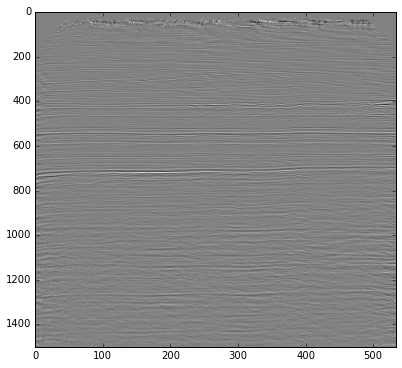

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,6))
plt.imshow(data.T, cmap="gray", aspect=0.33)
plt.show()

### Read 3D data

In [83]:
ls data

2d_gaussian.png                   M-MG-70_14.3_135.9.png            P-63_cuttings.csv
31_81_PR.sgy                      Nova_Scotia.sgy                   ld0057_file_00095.sgy
F3_MFS4_Horizon.txt               P-129_280_1935.png                out.sgy
F3_Seismic_500-1500ms.txt         P-129_out.LAS*                    test.sgy
F3_very_small.sgy                 P-129_striplog_from_cuttings.las
HUN00-ALT-01_STK.sgy              P-129_striplog_from_image.las


In [94]:
from segpy.reader import create_reader
from segpy_numpy.dtypes import make_dtype

tiny_3d = 'data/F3_very_small.sgy'
big_3d = 'data/Nova_Scotia.sgy'

with open(big_3d, 'rb') as f:
    segy_reader = create_reader(f)
    
    i_size = segy_reader.num_inlines()
    x_size = segy_reader.num_xlines()
    t_size = segy_reader.max_num_trace_samples()
    
    dtype = make_dtype(segy_reader.data_sample_format)
    null = 0.0
    
    data = np.full((i_size, x_size, t_size), null, dtype)
    
    for inline_num, xline_num in segy_reader.inline_xline_numbers():
        trace_index = segy_reader.trace_index((inline_num, xline_num))
        trace = segy_reader.trace_samples(trace_index)

        i_index = segy_reader.inline_numbers().index(inline_num)
        x_index = segy_reader.xline_numbers().index(xline_num)

        data[i_index, x_index] = trace


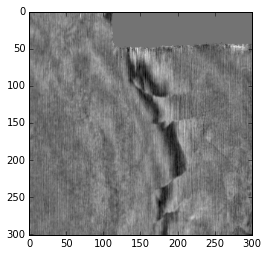

In [95]:
plt.imshow(data[:,:,200], cmap="gray", aspect=1)

In [86]:
data.dtype

dtype('float32')

In [87]:
s = data.shape
s

(11, 11, 463)

In [88]:
data16 = data.astype('int16')  # -32768 to 32767
data32 = data.astype('int32')  # -2147483648 to 2147483647
data64 = data.astype('int64')

In [89]:
data16[3,3]

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,   -395,   -157,   -225,
         -643,  -1063,  -1990,  -2890,  -2065,    447,   3003,   4038,
         2901,   1439,   1983,   2932,   1340,  -2093,  -4581,  -4044,
          -41,   4527,   5620,   3240,    365,  -1915,  -4411,  -6504,
        -5778,  -1708,   2284,   3076,   1656,    211,   -660,   -657,
          148,    639,    323,   -551,  -1797,  -1895,    778,   4101,
         4124,    765,  -2233,  -2276,   -479,    617,    253,   -688,
        -1142,    -61,   1744,   1141,  -1529,  -1429,   1500,   1878,
          -39,    415,   1488,   -440,  -1750,    293,   1077,   -990,
        -1496,   -366,   -681,   -445,   1951,   2648,    713,   -118,
          123,   -537,   -488,    473,     25,   -880,   -938,  -1217,
         -462,   1341,      6,  -2895,  -1906,     17,   -850,   -418,
         1706,   1103,   -652,  -1012,  -1097,    355,   2280,     37,
      

### Write SEGY

This code is adapted from [ascii2segy](https://github.com/kwinkunks/ascii2segy/blob/master/ascii2segy.py).

In [115]:
import segpy
from segpy import reader
from segpy import toolkit
from segpy import encoding


def write_segy(data, outfile, dtype=5):
    start_time = 0
    sample_interval = 4 # ms
    number_samples = data.shape[-1]

    if data.ndim == 3:
        # These are really indices, not line numbers.
        inlines = np.arange(0, data.shape[0], 1)
        xlines = np.arange(0, data.shape[1], 1)
    else:
        inlines = [0]
        xlines = np.arange(0, data.shape[0], 1)

    # dtype = 5  # {8: 'int8', 1: 'ibm', 2: 'int32', 3: 'int16', 5: 'float32'}
    segy_type = segpy.datatypes.DATA_SAMPLE_FORMAT_TO_SEG_Y_TYPE[dtype]

    with open(outfile, 'wb') as fo:

        # Write the text header. It can contain whatever you like.
        info_header = [
            "Created using segpy github.com/rob-smallshire/segpy",
        ]

        trh = [s[:80]+(80-len(s))*' ' for s in info_header]  # Exactly 80 columns
        trh = trh[:40]  # Limit to 40 lines
        toolkit.write_textual_reel_header(fo, trh, encoding.ASCII) # Forget EBCDIC

        # Build the binary header.
        brh = segpy.binary_reel_header.BinaryReelHeader()
        # MANDATORY FIELDS
        # brh.data_traces_per_ensemble = 0 # Pre-stack data
        # brh.auxiliary_traces_per_ensemble = 0 # Pre-stack data
        brh.sample_interval = sample_interval*1000 # microseconds    
        brh.num_samples = data.shape[-1]
        brh.fixed_length_trace_flag = 1 # Default is 0 = varying trace length
        # brh.format_revision_num = 1 # Default is 1
        brh.data_sample_format = dtype  # Default is 5 = IEEE float
        # brh.num_extended_textual_headers = 0 # Default is 0
        # RECOMMENDED FIELDS
        brh.ensemble_fold = 1 # Default = 0
        brh.trace_sorting = 4 # 2 = cdp, 4 = stack, default 0 = unknown
        brh.measurement_system = 1 # m, default 0 = unknown, 2 = ft
        
        # Write the binary header.
        toolkit.write_binary_reel_header(fo, brh)

        # Pre-format trace header format.
        trace_header_packer = toolkit.make_header_packer(segpy.trace_header.TraceHeaderRev1)

        # Make a trace geometry.
        xxlines, iinlines = np.meshgrid(xlines, inlines)
        trace_iter = np.vstack([iinlines.flat, xxlines.flat]).T
        
        # Iterate over the geometry and populate the traces.
        i = 0
        for inline, xline in trace_iter:
            i += 1
            
            if data.ndim == 3:
                samples = data[inline, xline]
            else:
                samples = data[xline]

            trace_header = segpy.trace_header.TraceHeaderRev1()

            trace_header.field_record_num = i
            trace_header.trace_num = i
            trace_header.num_samples = len(samples)
            trace_header.sample_interval = sample_interval

            if data.ndim == 3:
                trace_header.file_sequence_num = inline
                trace_header.ensemble_num = xline
                trace_header.inline_number = inline
                trace_header.crossline_number = xline
            else:
                trace_header.file_sequence_num = 1000 + i
                trace_header.ensemble_num = xline
                trace_header.shotpoint_number = xline

            # Write trace header and data.
            toolkit.write_trace_header(fo, trace_header, trace_header_packer)
            toolkit.write_trace_samples(fo, samples, seg_y_type=segy_type)  # Always use IEEE or int

In [116]:
%timeit write_segy(data[:100, :100, :], 'data/test.sgy', dtype=5) # IEEE float

1 loops, best of 3: 2.85 s per loop


In [96]:
%timeit write_segy(data[:100, :100, :], 'data/test.sgy', dtype=1) # IBM float, 90x time for IEEE floats!

1 loops, best of 3: 3min 58s per loop


In [ ]:
filename = "data/test.sgy"
volume = obspy.read(filename)
new = np.array([t.data for t in volume])
new = np.reshape(new, data.shape)

plt.figure(figsize=(12, 12))
plt.imshow(new.T, cmap='gray', aspect=1.5)
plt.show()

In [99]:
new.shape

(5859, 2000)

## ieee2ibm()

Curious: let's compare the `obspy` and `segpy` methods.

In [105]:
def ieee2ibm_obspy(data, endian='>'):
    """
    pack_4byte_IBM()
    
    Packs 4 byte IBM floating points. This will only work if the host system
    internally uses little endian byte orders.
    """
    LOG2 = 0.3010299956639812
    
    # Check the dtype and raise exception otherwise!
    if data.dtype != np.float64 and data.dtype != np.float32:
        raise WrongDtypeException
    # Calculate the values. The theory is explained in
    # http://www.codeproject.com/KB/applications/libnumber.aspx

    # Calculate the signs.
    signs = np.empty(len(data), dtype=np.uint8)
    temp_signs = np.sign(data)
    # Negative numbers are encoded as sign bit 1, positive ones as bit 0.
    signs[temp_signs == 1] = 0
    signs[temp_signs == -1] = 128

    # Make absolute values.
    data = np.abs(data)

    # Store the zeros and add an offset for numerical stability,
    # they will be set to zero later on again
    zeros = np.where(data == 0.0)
    data[zeros] += 1e-32

    # Calculate the exponent for the IBM data format.
    exponent = ((np.log10(data) / LOG2) * 0.25 + 65).astype(np.uint32)

    # Now calculate the fraction using single precision.
    fraction = np.require(
        data, np.float32) / (16.0 ** (np.require(exponent, np.float32) - 64))

    # Normalization.
    while True:
        # Find numbers smaller than 1/16 but not zero.
        non_normalized = np.where(np.where(fraction, fraction, 1) < 0.0625)[0]
        if len(non_normalized) == 0:
            break
        fraction[non_normalized] *= 16
        exponent[non_normalized] -= 1

    # If the fraction is one, change it to 1/16 and increase the exponent by
    # one.
    ones = np.where(fraction == 1.0)
    fraction[ones] = 0.0625
    exponent[ones] += 1

    # Times 2^24 to be able to get a long.
    fraction *= 16777216.0
    # Convert to unsigned long.
    fraction = np.require(fraction, np.uint64)

    # Use 8 bit integers to be able to store every byte separately.
    new_data = np.zeros(4 * len(data), np.uint8)

    # The first bit is the sign and the following 7 are the exponent.
    byte_0 = np.require(signs + exponent, np.uint8)
    # All following 24 bit are the fraction.
    byte_1 = np.require(np.right_shift(np.bitwise_and(fraction, 0x00ff0000),
                                       16), np.uint8)
    byte_2 = np.require(np.right_shift(np.bitwise_and(fraction, 0x0000ff00),
                                       8), np.uint8)
    byte_3 = np.require(np.bitwise_and(fraction, 0x000000ff), np.uint8)

    # Depending on the endianness store the data different.
    # big endian.
    if endian == '>':
        new_data[0::4] = byte_0
        new_data[1::4] = byte_1
        new_data[2::4] = byte_2
        new_data[3::4] = byte_3
    # little endian>
    elif endian == '<':
        new_data[0::4] = byte_3
        new_data[1::4] = byte_2
        new_data[2::4] = byte_1
        new_data[3::4] = byte_0
    # Should not happen.
    else:
        raise Exception
    # Write the zeros again.
    new_data.dtype = np.uint32
    new_data[zeros] = 0
    # Write to file.
    return new_data.tostring()

In [107]:
a = np.random.random(1000)
%timeit ieee2ibm_obspy(a)

10000 loops, best of 3: 139 µs per loop


That's fast.

The segpy implementation loops over floats, it's gonna be slow.

## Standalone SEGYpy file, resurrected from 2007 :)

Try to write the array `data` using this old thing.

In [11]:
from segypy import write_segy
from io import BytesIO

In [12]:
databytes = BytesIO()
write_segy(data, databytes, dt=0.004, t_min=0)
databytes.seek(0)

0

In [13]:
import struct


In [14]:
struct.pack('l', 4.5)

error: required argument is not an integer

In [114]:
def get_trace_indices(y, ntraces, spacing):
    if spacing == 'random':
        x = 0.05 + 0.9*np.random.random(ntraces)  # avoids edges
        ti = np.sort(x * y)
    else:
        n = ntraces + 1
        ti = np.arange(1./n, 1., 1./n) * y
    return np.round(ti).astype(int)



In [116]:
get_trace_indices(1000, 5, 'random')

array([101, 326, 730, 880, 883])